# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Felix Gilbert

## Menjawab pertanyaan di poin 1 Landasan Teori

1. Analisis Data dan Perannya dalam Pengambilan Keputusan

Analisis data merupakan proses mengolah dan menginterpretasikan data untuk menemukan pola, tren, serta insight yang bermakna. Dalam pengambilan keputusan berbasis data, analisis data berperan penting dalam menyediakan dasar objektif sehingga keputusan yang diambil tidak hanya bergantung pada asumsi, tetapi didukung oleh bukti empiris dari data yang dianalisis.

2. Descriptive Analysis dan Exploratory Data Analysis (EDA)

Descriptive Analysis bertujuan untuk merangkum data menggunakan statistik dasar seperti rata-rata, median, dan distribusi data guna memahami karakteristik umum dataset. Sementara itu, Exploratory Data Analysis (EDA) dilakukan untuk mengeksplorasi data secara lebih mendalam dengan mencari pola, tren, dan hubungan antar variabel. EDA membantu memahami bagaimana suatu variabel saling mempengaruhi dan mengidentifikasi fenomena penting dalam data.

3. Pentingnya Data Cleaning dan Data Wrangling

Data mentah sering mengandung missing value, duplikasi, atau nilai yang tidak valid, terutama pada dataset kualitas udara yang berasal dari sensor. Oleh karena itu, data cleaning dan data wrangling diperlukan untuk memastikan kualitas data sebelum dilakukan analisis lanjutan. Proses ini bertujuan agar hasil analisis dan model yang dibangun dapat memberikan insight yang akurat dan dapat dipercaya.

4. Peran Visualisasi Data

Visualisasi data digunakan untuk menyampaikan hasil analisis secara lebih jelas dan mudah dipahami. Melalui grafik dan plot, pola tren kualitas udara, hubungan antar variabel lingkungan, serta perbedaan kondisi tertentu dapat diamati dengan lebih intuitif dibandingkan hanya menggunakan tabel numerik.

5. Machine Learning yang Digunakan (Regresi)

Pada analisis ini digunakan metode regresi untuk memodelkan hubungan antara faktor lingkungan, seperti suhu dan kelembaban, dengan tingkat konsentrasi polusi udara. Regresi dipilih karena variabel target yang dianalisis berupa nilai numerik kontinu, sehingga metode ini sesuai untuk permasalahan prediksi.

Selain untuk melakukan prediksi, regresi juga digunakan untuk memahami pengaruh setiap variabel terhadap tingkat polusi udara. Dengan demikian, model regresi berfungsi sebagai alat pendukung Exploratory Data Analysis (EDA) untuk memperkuat insight yang diperoleh dari analisis statistik dan visualisasi, tanpa berfokus pada optimasi model.

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren dan pola konsentrasi PM2.5 dari waktu ke waktu, dan pada periode apa kualitas udara berada pada tingkat yang berisiko bagi kesehatan masyarakat?

- Pertanyaan 2 : Seberapa baik faktor lingkungan dapat digunakan untuk memprediksi konsentrasi PM2.5 menggunakan model regresi, dan bagaimana hasil prediksi ini dapat mendukung sistem peringatan dini kualitas udara?

## Import Semua Packages/Library yang Digunakan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Data Wrangling

### Gathering Data

In [6]:
df = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv")
df.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


**Insight:**
- Dataset berisi data time-series dengan interval jam.
- Variabel utama yang dianalisis adalah PM2.5 sebagai indikator kualitas udara.

### Assessing Data

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,913
PM10,548
SO2,1296
NO2,1365
CO,2178


**Insight:**
- Terdapat missing value pada beberapa kolom.
- Data terdiri dari variabel numerik dan waktu yang perlu diproses lebih lanjut.

### Cleaning Data

In [ ]:
df['datetime'] = pd.to_datetime(
    df[['year', 'month', 'day', 'hour']]
)

df = df.sort_values('datetime')
df = df.set_index('datetime')

df['PM2.5'] = df['PM2.5'].interpolate(method='time')

weather_cols = ['TEMP', 'DEWP', 'PRES', 'WSPM']
df[weather_cols] = df[weather_cols].fillna(method='ffill')

q1 = df['PM2.5'].quantile(0.01)
q99 = df['PM2.5'].quantile(0.99)

df['PM2.5_clean'] = df['PM2.5'].clip(q1, q99)
df = df.reset_index()


/tmp/ipython-input-2163688136.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[weather_cols] = df[weather_cols].fillna(method='ffill')


**Insight:**
- Interpolasi time-series menjaga kontinuitas data
- Outlier ekstrem dikendalikan agar analisis lebih stabil
- Data siap untuk EDA & regresi

## Exploratory Data Analysis (EDA)

### Explore ...

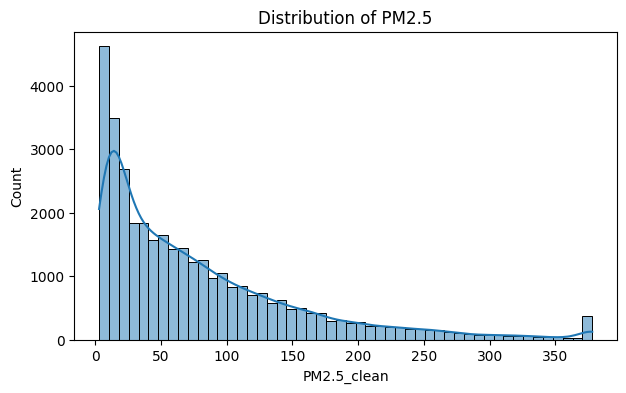

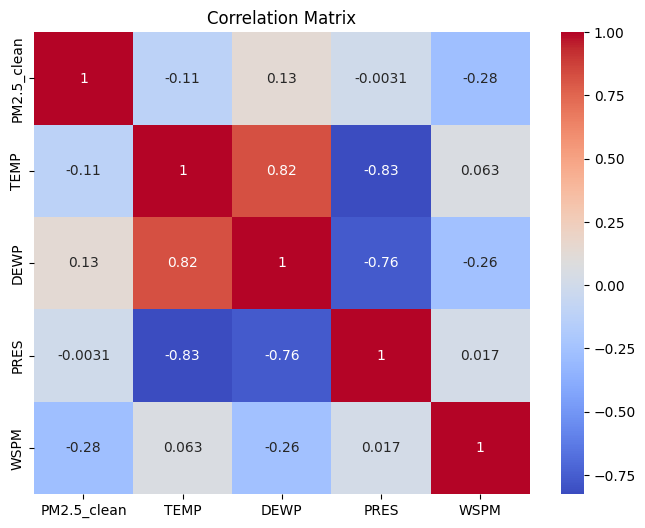

In [ ]:
df[['PM2.5_clean', 'TEMP', 'DEWP', 'PRES', 'WSPM']].describe()

plt.figure(figsize=(7,4))
sns.histplot(df['PM2.5_clean'], bins=50, kde=True)
plt.title("Distribution of PM2.5")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(
    df[['PM2.5_clean', 'TEMP', 'DEWP', 'PRES', 'WSPM']].corr(),
    annot=True, cmap='coolwarm'
)
plt.title("Correlation Matrix")
plt.show()


**Insight:**
- PM2.5 memiliki variasi tinggi dan distribusi tidak simetris
- Beberapa variabel cuaca berkorelasi dengan PM2.5
- Data layak digunakan untuk analisis lanjutan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Tren PM2.5 dari Waktu ke Waktu

/tmp/ipython-input-2963247060.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


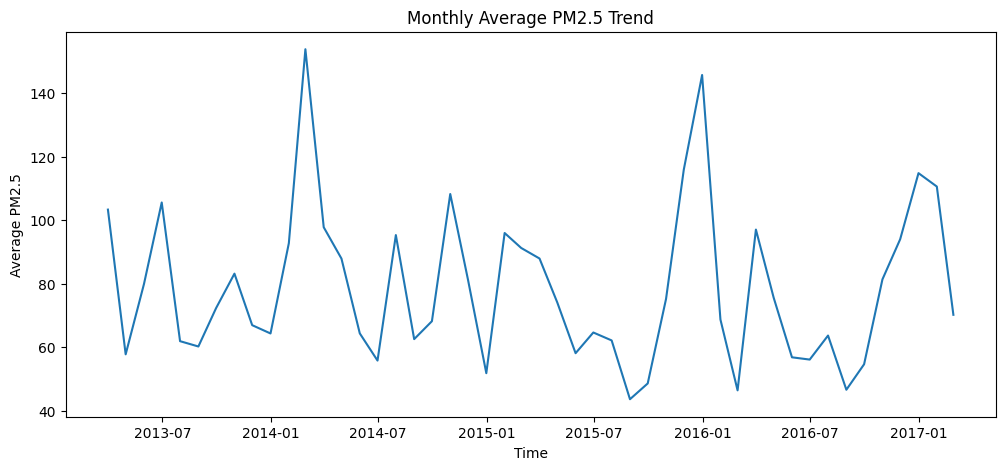

In [ ]:
df_monthly = (
    df.set_index('datetime')['PM2.5_clean']
    .resample('M')
    .mean()
)

plt.figure(figsize=(12,5))
plt.plot(df_monthly)
plt.xlabel("Time")
plt.ylabel("Average PM2.5")
plt.title("Monthly Average PM2.5 Trend")
plt.show()


### Pertanyaan 2: Regresi untuk Prediksi PM2.5

In [ ]:
X = df[['TEMP', 'DEWP', 'PRES', 'WSPM']]
y = df['PM2.5_clean']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


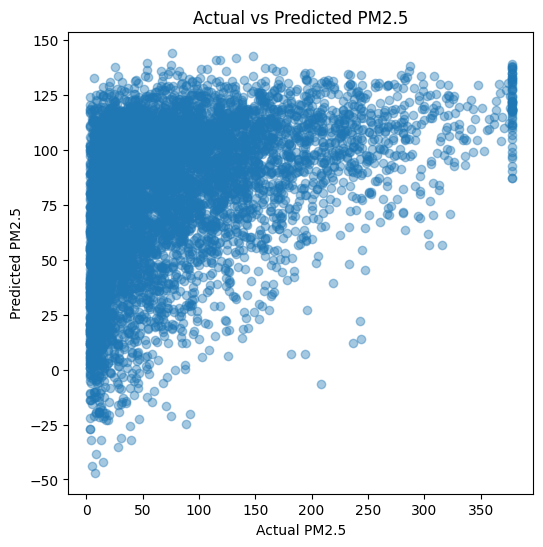

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("Actual vs Predicted PM2.5")
plt.show()


**Insight:**
- Model regresi mampu menangkap pola umum PM2.5
- Hasil prediksi dapat digunakan sebagai indikator awal risiko polusi

## Analisis Lanjutan (Opsional,)

In [ ]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 68.72633375359771
R² Score: 0.17769730144460283


**Insight:**
- Model memiliki performa moderat
- Cocok sebagai sistem pendukung keputusan, bukan prediksi presisi

## Conclusion

- Conclution pertanyaan 1
Analisis data menunjukkan bahwa konsentrasi PM2.5 memiliki pola temporal dan musiman yang jelas. Pada periode tertentu, nilai PM2.5 berada pada tingkat yang berpotensi membahayakan kesehatan masyarakat. Temuan ini menegaskan pentingnya pemantauan kualitas udara secara berkelanjutan sebagai dasar dalam perumusan kebijakan lingkungan dan kesehatan publik.

- Conclution pertanyaan 2
Hasil regresi menunjukkan bahwa faktor cuaca memiliki kontribusi dalam memprediksi konsentrasi PM2.5. hasil prediksi mampu memberikan gambaran awal mengenai risiko polusi udara. Model ini dapat dimanfaatkan sebagai sistem pendukung keputusan dan peringatan dini, khususnya dalam perencanaan respons terhadap kondisi kualitas udara yang memburuk.